# Random Forest for VALENTIA

### This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Data Wrangling
#### 3. Reshaping for Modeling
#### 4. Data Split
#### 5. Random Forest Model
#### 6. Uncovering Feature Importances

## 1. Importing Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Define path
path = r'C:\Users\16307\Desktop\CareerFoundry\Tasks - Machine Learning\ClimateWins Analysis\Data Sets'

In [6]:
# Import cleaned data
X = pd.read_csv(os.path.join(path, 'unscaled_cleaned_with_date.csv'), index_col = False)

In [7]:
# Read in the pleasant weather data
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [8]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [9]:
X.shape

(22950, 137)

In [10]:
pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
pleasant.shape

(22950, 16)

## 2. Data Wrangling
- Reduce data to only VALENTIA weather station

In [13]:
# Create a list of "Valentia" columns
valentia_list = list(x for x in X.columns if x.find('VALENTIA') >=0)
valentia_list

['VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']

In [14]:
# Create dataframe 
df_valentia = X[valentia_list]
df_valentia

,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...
22945,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [15]:
# Reduce pleasant weather dataset to valentia columns
pleasant_valentia = pleasant['VALENTIA_pleasant_weather']
pleasant_valentia

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: VALENTIA_pleasant_weather, Length: 22950, dtype: int64

In [16]:
df_valentia.shape # dataset has the correct shape

(22950, 9)

In [17]:
pleasant_valentia.shape # dataset has the correct shape

(22950,)

## 3. Reshaping for Modeling

In [19]:
X2 = df_valentia

In [20]:
y2 = pleasant_valentia

In [21]:
# Turn X2 and y2 from df to arrays
X = np.array(X2)
y = np.array(y2)

## 4. Data Split 

In [23]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [24]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [25]:
X_train

array([[ 6.    ,  0.83  ,  1.0082, ..., 15.6   , 13.7   , 17.6   ],
       [ 5.    ,  0.82  ,  1.0142, ..., 10.7   ,  7.9   , 13.5   ],
       [ 5.    ,  0.9   ,  1.0186, ...,  1.    , -3.9   ,  5.9   ],
       ...,
       [ 6.    ,  0.74  ,  1.023 , ...,  9.6   ,  7.8   , 11.5   ],
       [ 7.    ,  0.86  ,  1.0124, ..., 11.1   ,  8.5   , 13.7   ],
       [ 7.    ,  0.8   ,  1.0242, ...,  9.6   ,  6.1   , 13.    ]])

In [26]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
X_test

array([[ 5.    ,  0.82  ,  1.0142, ..., 10.7   ,  7.9   , 13.5   ],
       [ 5.    ,  0.84  ,  0.9842, ...,  5.8   ,  3.3   ,  8.4   ],
       [ 7.    ,  0.84  ,  1.004 , ..., 16.6   , 15.1   , 18.1   ],
       ...,
       [ 7.    ,  0.9   ,  1.0064, ..., 13.6   , 10.7   , 16.6   ],
       [ 6.    ,  0.88  ,  1.029 , ...,  9.3   ,  6.4   , 12.2   ],
       [ 4.    ,  0.82  ,  1.0235, ..., 11.2   ,  6.8   , 15.7   ]])

In [28]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## 5. Random Forest Model

In [30]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


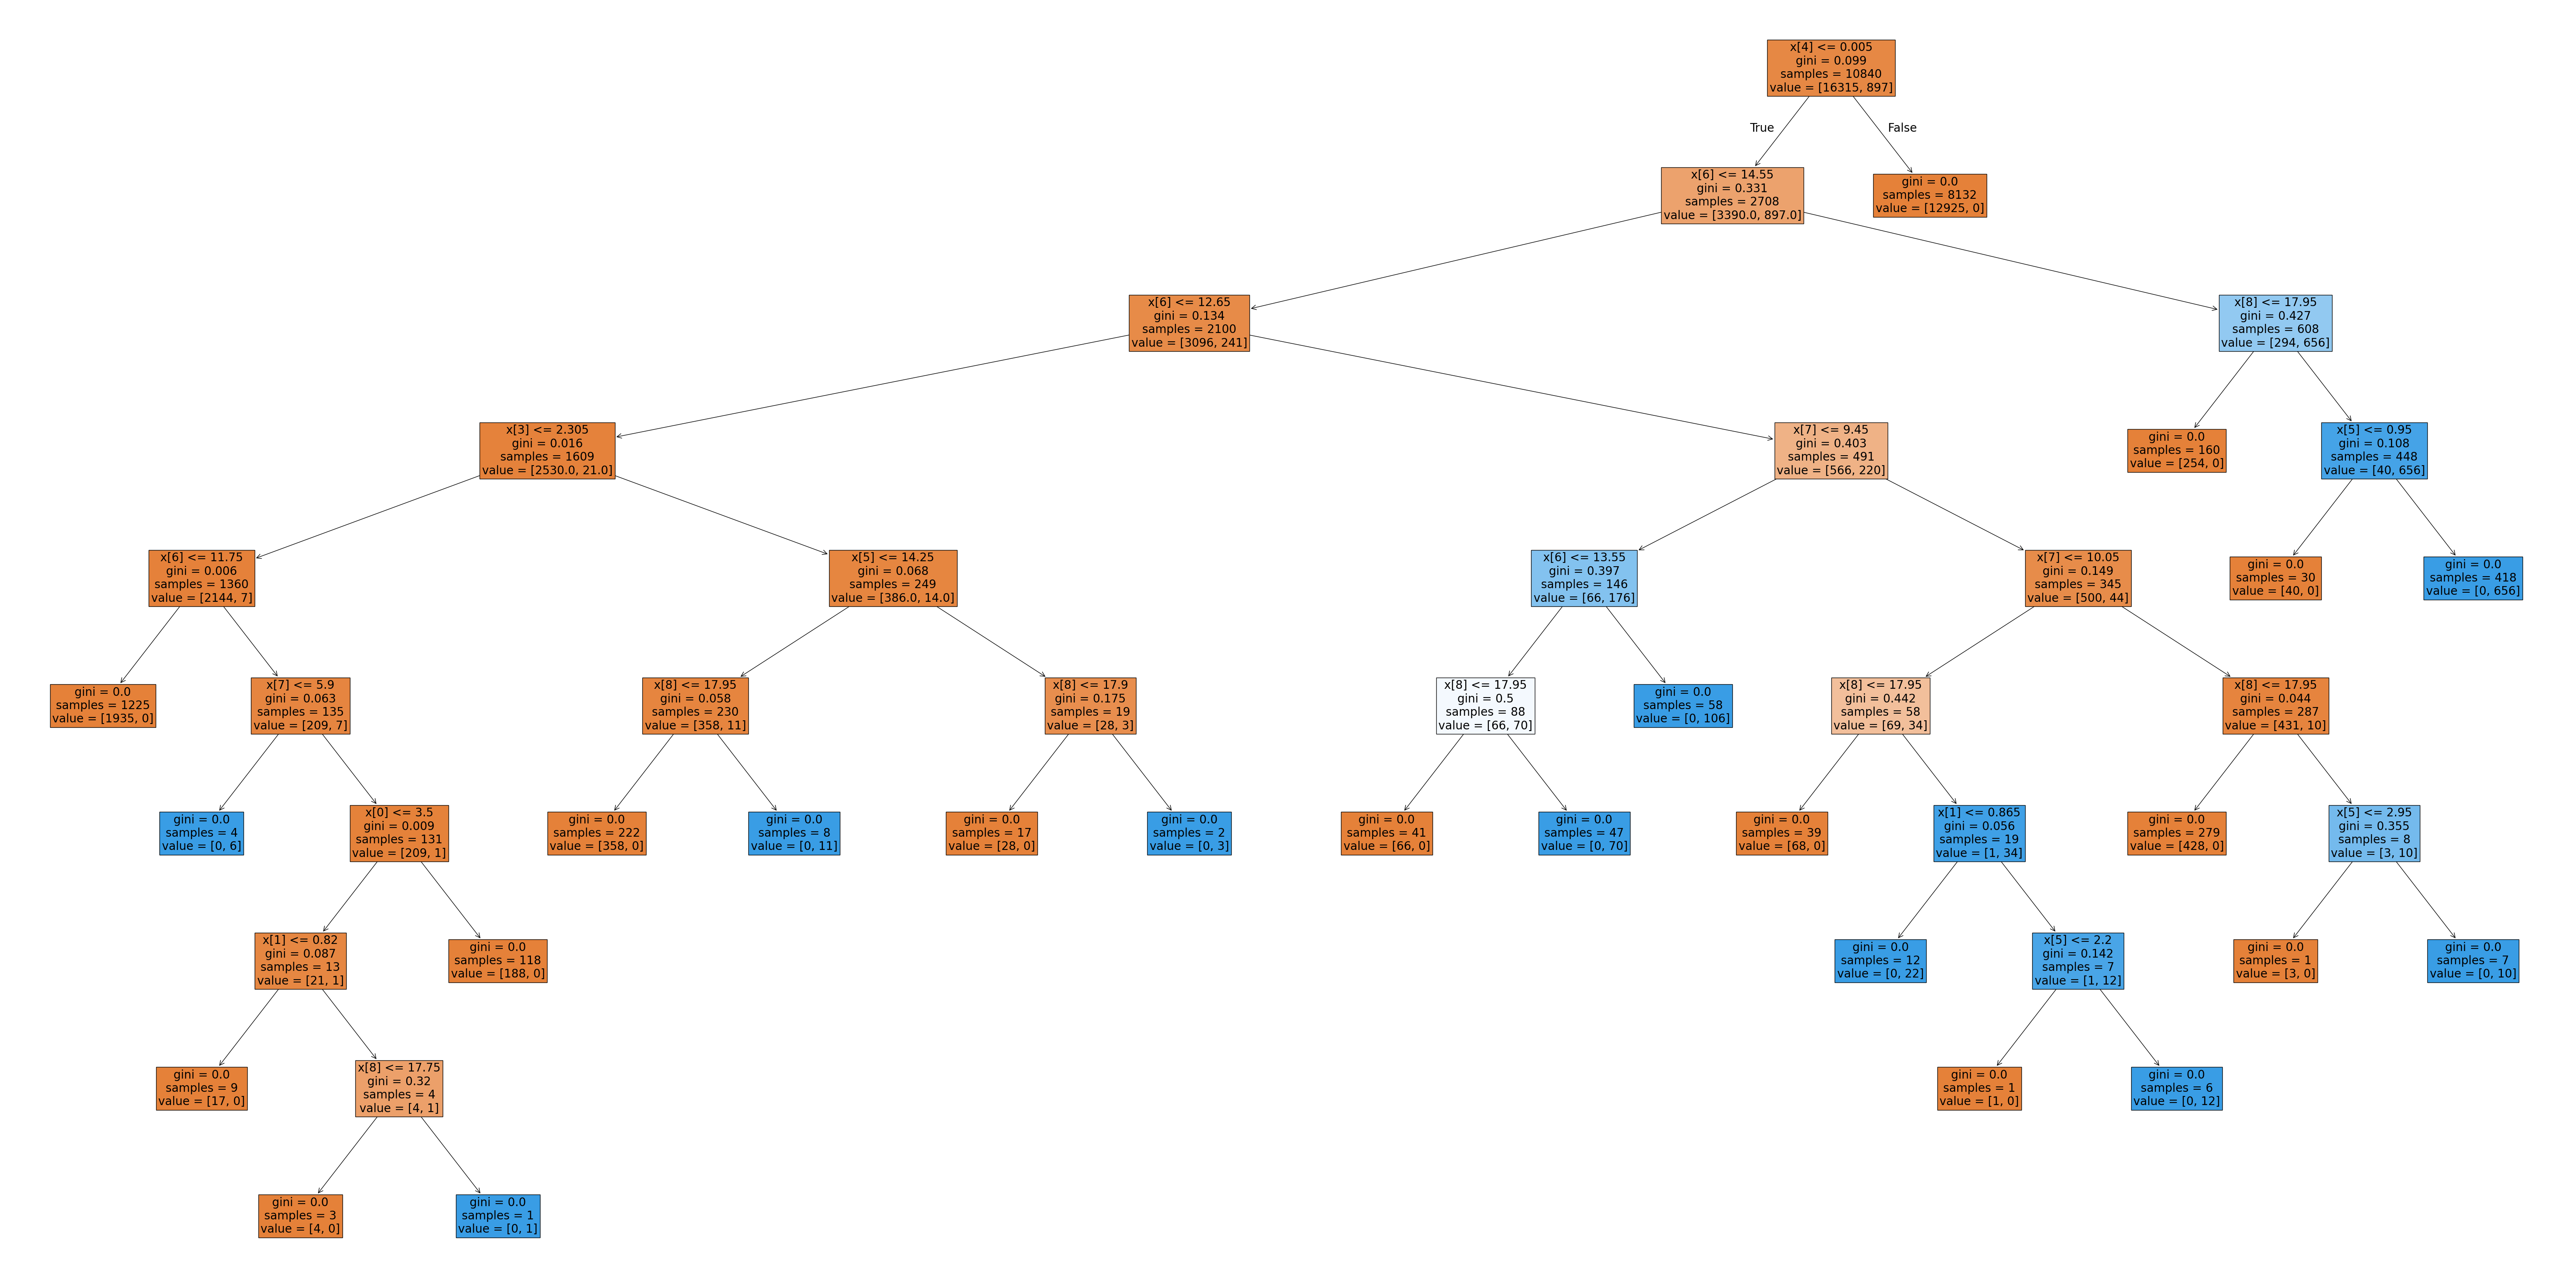

In [32]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [33]:
fig.savefig(os.path.join(path, 'random_forest_Valentia.png'),bbox_inches='tight')

## 6. Uncovering Feature Importances

In [35]:
# Retrieve feature importances from the trained model
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.04250866, 0.00594008, 0.02602672, 0.03896368, 0.26555048,
       0.07705957, 0.08430751, 0.02244848, 0.43719483])

In [36]:
# Create a list of weather features
wx_list = [feature.replace('VALENTIA_', '') for feature in valentia_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [37]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.042509
humidity            0.005940
pressure            0.026027
global_radiation    0.038964
precipitation       0.265550
sunshine            0.077060
temp_mean           0.084308
temp_min            0.022448
temp_max            0.437195
dtype: float64

In [ ]:
important_sorted = important.sort_values(ascending=False)
important_sorted

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


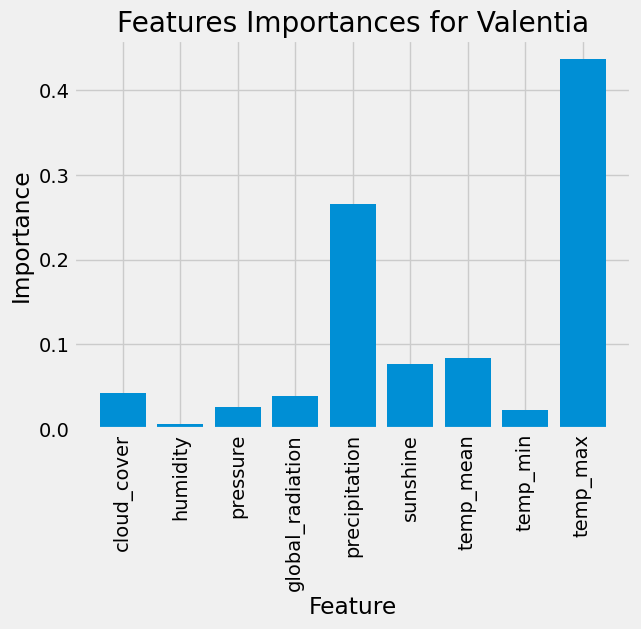

In [38]:
# Sort the features and their importances
sorted_indices = sorted(range(len(newarray)), key=lambda i: newarray[i], reverse=True)
sorted_newarray = [newarray[i] for i in sorted_indices]
sorted_wx_list = [wx_list[i] for i in sorted_indices]

# Plot the sorted results
%matplotlib inline
plt.style.use('fivethirtyeight')

# Create x locations for sorted features
x_values = list(range(len(sorted_newarray)))

plt.bar(x_values, sorted_newarray, orientation='vertical')
plt.xticks(x_values, sorted_wx_list, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Features Importances for Valentia')

# Save the sorted plot
plt.savefig(os.path.join(path, 'Valentia_feature_importances.png'), bbox_inches='tight')
plt.show()